<a href="https://www.kaggle.com/code/kyeongsupchoi/time-series-anomaly?scriptVersionId=132749640" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
* [Step 1: Exploratory Data Analysis](#step-one)
* [Step 2: Model Training](#step-two)
* [Step 3: Data Visualization](#step-three)

In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt

<a id="step-one"></a>
# Step 1: Exploratory Data Analysis

In [2]:
# Loads dataframe from csv file
datum = pd.read_csv("/kaggle/input/nyc-taxi-traffic/dataset.csv",
                parse_dates=['timestamp'],
                index_col=0)

# First 5 values
datum.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [3]:
# Number of entries and datatypes
datum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 241.9 KB


In [4]:
# Mean, Standard Deviation, Minimum, Maximum, and Quartile Values
datum.describe()

,value
count,10320.000000
mean,15137.569380
std,6939.495808
min,8.000000
25%,10262.000000
50%,16778.000000
75%,19838.750000
max,39197.000000


Step 2 Conclusions
- Dataset of two columns and 10,320 rows.
- The first column 'timestamp' begins at "2014-07-01 00:00:00" and each row increments at a rate of 30 minutes, the Series is parsed as a Pandas datestamp object.
- The second column 'value' is the current number of active taxis in NYC at the timestamp, with a mean of 15138 and standard deviation of 6939, values are saved as int datatype.

<a id="step-two"></a>
# Step 2: Model Training

In [5]:
# Initialize Classifier object
isoforest = IsolationForest(contamination=float(0.01))

# Train Classifier object on Trained Data
isoforest.fit(pd.DataFrame(datum['value']))

# Predict the response for test dataset
predictions = isoforest.predict(pd.DataFrame(datum['value']))

# Concatenates the predictions to the initial dataframe
datums = pd.concat([datum.reset_index(drop=True), pd.DataFrame(predictions)], axis=1)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


<a id="step-three"></a>
# Step 3: Data Visualization

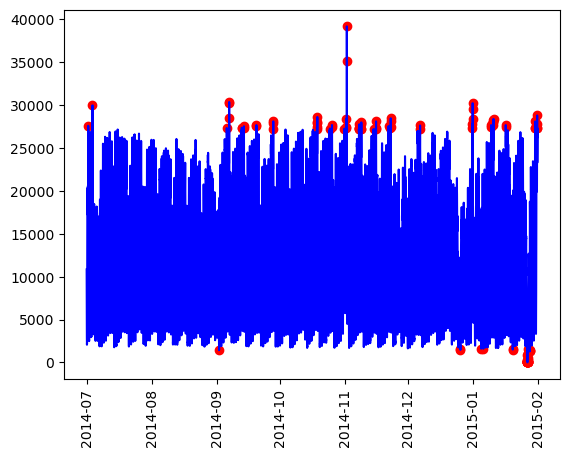

In [6]:
fig, ax = plt.subplots()

# Isolate anomaly times
a = datums.loc[datums[0] == -1, ['timestamp', 'value']]

# Plot the initial data
ax.plot(datum['timestamp'], datum['value'], color='blue')

# Scatterplot the anomalies
ax.scatter(a['timestamp'], a['value'], color='red')

plt.xticks(rotation=90)

plt.show()

In [7]:
datum['hour'] = datum['timestamp'].dt.hour
datum['weekday'] = datum['timestamp'].dt.weekday
datum

,timestamp,value,hour,weekday
0,2014-07-01 00:00:00,10844,0,1
1,2014-07-01 00:30:00,8127,0,1
2,2014-07-01 01:00:00,6210,1,1
3,2014-07-01 01:30:00,4656,1,1
4,2014-07-01 02:00:00,3820,2,1
...,...,...,...,...
10315,2015-01-31 21:30:00,24670,21,5
10316,2015-01-31 22:00:00,25721,22,5
10317,2015-01-31 22:30:00,27309,22,5
10318,2015-01-31 23:00:00,26591,23,5


Should analyze outliers